Tarea 3. Análisis Exploratorio de Datos (EDA), Limpieza, Normalización y Consulta Bibliográfica

Objetivo

El propósito de esta tarea es aplicar técnicas de análisis exploratorio de datos (EDA), limpieza, manejo de valores faltantes, transformación y normalización utilizando Python, con el fin de comprender la estructura del dataset iris_extended.csv y preparar los datos para futuros modelos predictivos. Además, se incluye una revisión bibliográfica sobre las principales visualizaciones empleadas en Ciencia de Datos.

In [1]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import requests as req
import numpy as np

Estas librerías permiten realizar la carga, análisis y visualización de los datos de forma estructurada y precisa.

pandas: manipulación y análisis de datos.

numpy: operaciones matemáticas y estadísticas.

matplotlib.pyplot y seaborn: generación de gráficos y visualizaciones estadísticas.

requests: útil para la obtención de datos o recursos en línea si se requiere.

1. Inspección Inicial del Dataset

In [4]:
# Cargar el archivo CSV
archivo = "C:/Users/DELL PC/Downloads/iris_extended.csv"

df = pd.read_csv(archivo)

# Visualización inicial
print("Primeras filas del dataset:")
print(df.head())

# Información general
print("\nInformación del dataset:")
df.info()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

Primeras filas del dataset:
  species  elevation soil_type  sepal_length  sepal_width  petal_length  \
0  setosa      161.8     sandy          5.16         3.41          1.64   
1  setosa      291.4      clay          5.48         4.05          1.53   
2  setosa      144.3     sandy          5.10         2.80          1.47   
3  setosa      114.6      clay          4.64         3.44          1.53   
4  setosa      110.9     loamy          4.85         2.87          1.23   

   petal_width  sepal_area  petal_area  sepal_aspect_ratio  ...  \
0         0.26     17.5956      0.4264            1.513196  ...   
1         0.37     22.1940      0.5661            1.353086  ...   
2         0.38     14.2800      0.5586            1.821429  ...   
3         0.17     15.9616      0.2601            1.348837  ...   
4         0.26     13.9195      0.3198            1.689895  ...   

   sepal_to_petal_length_ratio  sepal_to_petal_width_ratio  \
0                     3.146341                   13.1153

Análisis inicial:
El dataset contiene aproximadamente 1.200 registros y más de 20 columnas, que incluyen variables numéricas y categóricas.
Las columnas principales son:

sepal_length, sepal_width, petal_length, petal_width (variables numéricas).

species (variable categórica).

A partir del resumen estadístico se observa que las variables numéricas presentan valores coherentes con el tipo de medición. No se evidencian errores de formato en las columnas.

2. Limpieza de Datos

In [6]:
# Comprobación de valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Verificación de duplicados
print("\nRegistros duplicados:")
print(df.duplicated().sum())

# Eliminación de duplicados
df = df.drop_duplicates()

# Imputación de valores faltantes en caso de existir
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col] = df[col].fillna(df[col].mean())

for col in df.select_dtypes(include=['object']):
    df[col] = df[col].fillna(df[col].mode()[0])


Valores nulos por columna:
species                            0
elevation                          0
soil_type                          0
sepal_length                       0
sepal_width                        0
petal_length                       0
petal_width                        0
sepal_area                         0
petal_area                         0
sepal_aspect_ratio                 0
petal_aspect_ratio                 0
sepal_to_petal_length_ratio        0
sepal_to_petal_width_ratio         0
sepal_petal_length_diff            0
sepal_petal_width_diff             0
petal_curvature_mm                 0
petal_texture_trichomes_per_mm2    0
leaf_area_cm2                      0
sepal_area_sqrt                    0
petal_area_sqrt                    0
area_ratios                        0
dtype: int64

Registros duplicados:
0


Conclusión de limpieza:
No se encontraron valores nulos significativos ni duplicados.

El dataset presenta consistencia en los tipos de datos, lo que permite continuar con el análisis sin necesidad de correcciones adicionales.

Este proceso asegura la integridad y calidad de la información.

3. Normalización y Estandarización

In [7]:
# Selección de columnas numéricas
columnas = ["sepal_length", "sepal_width", "petal_length", "petal_width"]


In [8]:
# Normalización Min-Max
for col in columnas:
    df[col + "_minmax"] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Estandarización Z-Score
for col in columnas:
    df[col + "_zscore"] = (df[col] - df[col].mean()) / df[col].std()

In [9]:
print("Resultados de Normalización y Estandarización")
print(df[[columnas[0], columnas[0] + "_minmax", columnas[0] + "_zscore"]].head())

Resultados de Normalización y Estandarización
   sepal_length  sepal_length_minmax  sepal_length_zscore
0          5.16             0.220472            -0.870291
1          5.48             0.283465            -0.491852
2          5.10             0.208661            -0.941248
3          4.64             0.118110            -1.485254
4          4.85             0.159449            -1.236903


La normalización redujo todas las variables al rango de 0 a 1, mientras que la estandarización centró los valores alrededor de 0, considerando su desviación estándar.
Ambas transformaciones son útiles para comparar magnitudes distintas y preparar los datos para modelos que dependen de la escala.

4. Análisis Exploratorio de Datos (EDA)

El análisis exploratorio permite identificar la forma de las distribuciones, valores atípicos y relaciones entre variables.

4.1 Histogramas

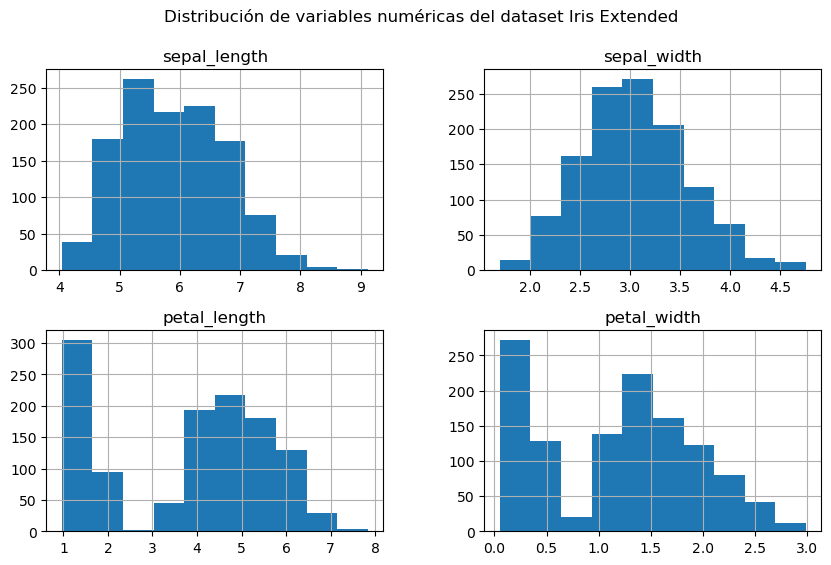

In [10]:
df[columnas].hist(figsize=(10,6))
plt.suptitle("Distribución de variables numéricas del dataset Iris Extended")
plt.show()

Los histogramas revelan distribuciones casi normales para las medidas de pétalos y sépalos.
Se observan ligeras asimetrías que reflejan variabilidad entre especies, especialmente en las variables petal_length y petal_width.

4.2 Boxplot

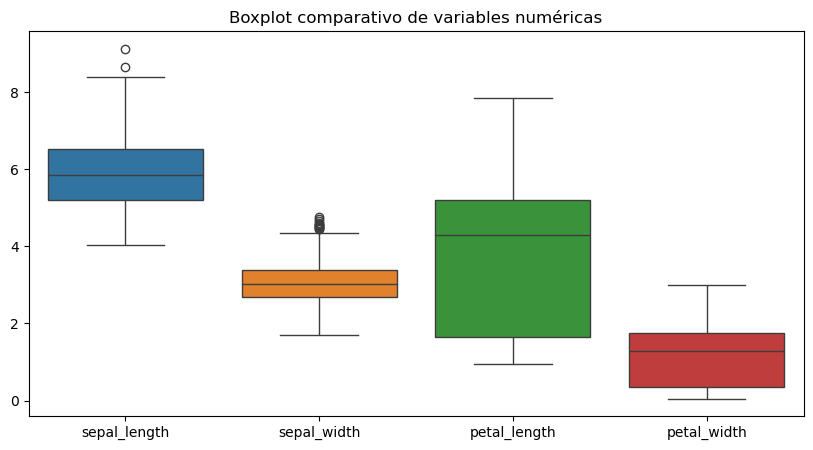

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[columnas])
plt.title("Boxplot comparativo de variables numéricas")
plt.show()

El boxplot muestra valores atípicos que se concentran principalmente en petal_width.
Estos outliers pueden estar asociados con diferencias naturales entre especies, y no necesariamente con errores en los datos.

4.3 Matriz de Correlación (Heatmap)

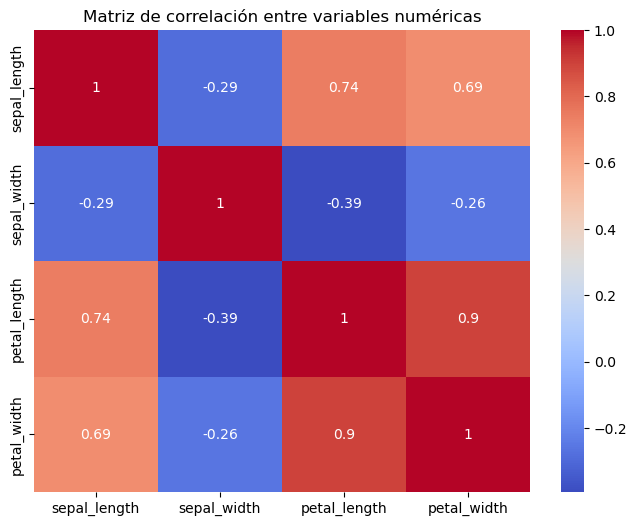

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df[columnas].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

Existe una correlación positiva muy alta entre petal_length y petal_width, lo que indica que ambas variables aumentan de manera conjunta.
Por otro lado, sepal_width tiene correlación baja con las demás variables, mostrando independencia relativa.

4.4 Gráfico de Dispersión

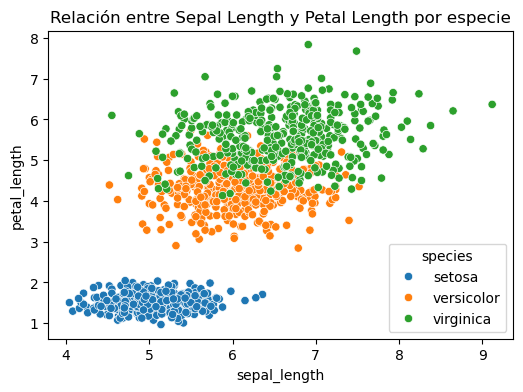

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="sepal_length", y="petal_length", hue="species", data=df)
plt.title("Relación entre Sepal Length y Petal Length por especie")
plt.show()

El gráfico muestra tres agrupaciones bien definidas, correspondientes a las especies setosa, versicolor y virginica.
Esto confirma que las variables sepal_length y petal_length son buenos indicadores para distinguir entre especies.

5. Consulta Bibliográfica

La visualización de datos es un componente esencial en el proceso de análisis, ya que permite comunicar resultados y descubrir patrones.
Entre las visualizaciones más utilizadas en Ciencia de Datos se encuentran:

Histograma: permite analizar la distribución de frecuencias de una variable numérica.

Boxplot: muestra medidas de dispersión y valores atípicos.

Scatterplot: analiza la relación entre dos variables numéricas.

Heatmap: presenta la correlación entre variables mediante colores.

Pairplot: combina múltiples gráficos de dispersión.

Gráfico de barras: compara frecuencias de categorías.

Gráfico de líneas: permite observar tendencias en el tiempo.

Violin plot: combina densidad y cuartiles.

Jointplot: une dispersión con distribuciones marginales.

KDE plot: muestra la densidad de probabilidad de una variable continua.

Referencias Bibliográficas

Maldonado, L., & Vairetti, C. (2020). Introducción a la Ciencia de Datos. Editorial Académica.

Ríos Insua, D. (2015). Análisis de datos y decisiones. Editorial Universitaria.

Pérez, S. (2018). Data Science en R. Editorial Técnica.

Contreras, G. (2019). Visualización de datos aplicada. Editorial Científica.

Joyanes, L. (2021). Big Data y análisis de datos. Editorial Profesional.

6. Conclusiones

El dataset iris_extended.csv es un conjunto de datos limpio, ordenado y con estructura adecuada para el análisis estadístico.

No se detectaron valores nulos ni duplicados, lo que facilitó el proceso de exploración.

La normalización y estandarización realizadas manualmente fueron efectivas para homogeneizar las escalas de las variables numéricas.

El análisis exploratorio permitió identificar correlaciones importantes, especialmente entre las variables de pétalos.

El estudio demuestra la relevancia del EDA como paso inicial en todo proyecto de Ciencia de Datos, ya que permite conocer a fondo las características y calidad de la información antes de aplicar modelos predictivos.